In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from numpy.polynomial.polynomial import Polynomial
from scipy import signal



In [26]:
time, y1, y2 = np.loadtxt("/Users/henrywang/Documents/PPGBP/PPGGlucoseDetection/GlucoseReadings/2024-08-12/index-writing-13-26-55.txt", delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2

In [15]:
#Polynomial detrend
def detrend_polynomial(data, degree = 2):
    x = np.arange(len(data))
    poly = Polynomial.fit(x, data, degree)
    trend = poly(x)
    return data - trend

#Moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w)/w, 'same')

Analyzing/plotting the data

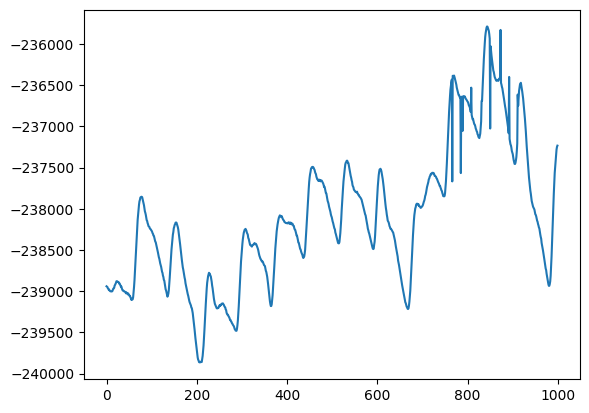

In [16]:
plt.plot(y2[1500:2500])

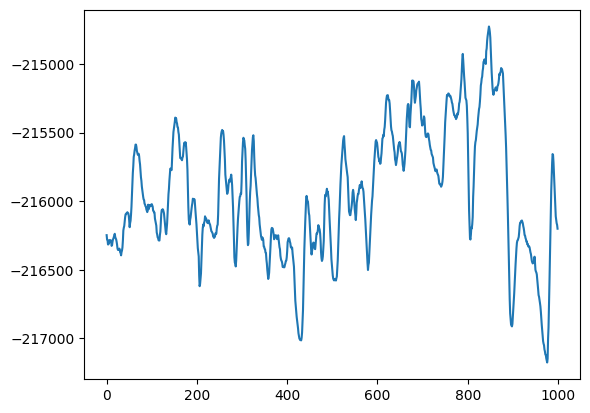

In [29]:
plt.plot(y1[1500:2500])

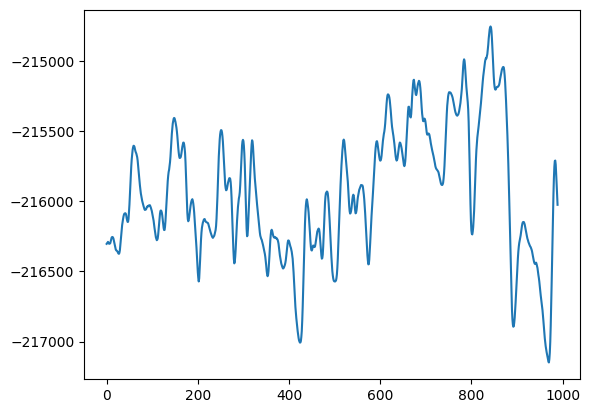

In [17]:
plt.plot(moving_average(y1[1500:2500],5 )[5:-5])

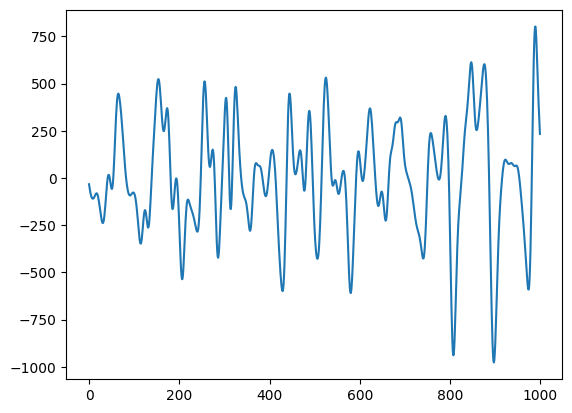

In [27]:
#Butterworth filtering
fpass = [0.5, 6.5]  # Passband frequency range
order = 3
sos = signal.butter(order, fpass, fs=100, btype='band', output='sos')


yFiltered1 = signal.sosfiltfilt(sos, y1[1500:2500])
plt.plot(yFiltered1)

In [30]:
y = detrend_polynomial(y1[1200:1700])
y2 = y2[300:800]

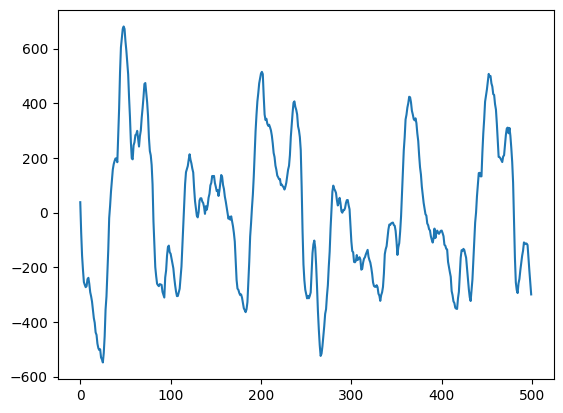

In [31]:
plt.plot(y)

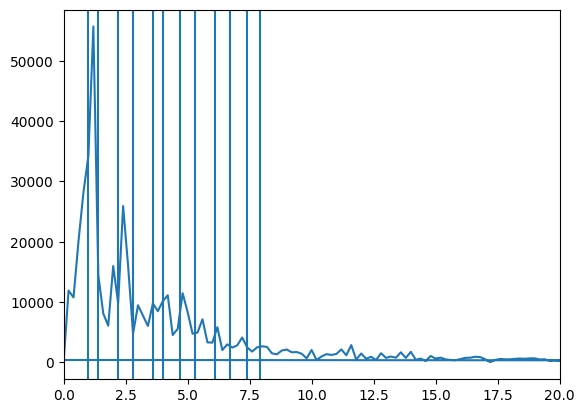

In [37]:
#Testing and plotting out fourier transform and relevant higher amplitudes

plt.xlim(0,20)
yf = fft(y)
xf = fftfreq(len(y), 1/100)
plt.plot(xf, np.abs(yf))
plt.axvline(x=1)
plt.axvline(x=1.4)

plt.axvline(x=2.2)
plt.axvline(x=2.8)

plt.axvline(x=3.6)
plt.axvline(x=4)

plt.axvline(x=4.7)
plt.axvline(x=5.3)

plt.axvline(x=6.1)
plt.axvline(x=6.7)

plt.axvline(x=7.4)
plt.axvline(x=7.9)


Testing if combining a bunch of different butterworth filter can reconstruct good data

In [38]:
sos1 = signal.butter(2, [1, 1.4], fs=100, btype='band', output='sos')
sos2 = signal.butter(2, [2.2, 2.8], fs=100, btype='band', output='sos')
sos3 = signal.butter(2, [3.6, 4], fs=100, btype='band', output='sos')

sos4 = signal.butter(2, [4.7, 5.3], fs=100, btype='band', output='sos')
sos5 = signal.butter(2, [6.1, 6.7], fs=100, btype='band', output='sos')
sos6 = signal.butter(2, [7.4, 7.9], fs=100, btype='band', output='sos')


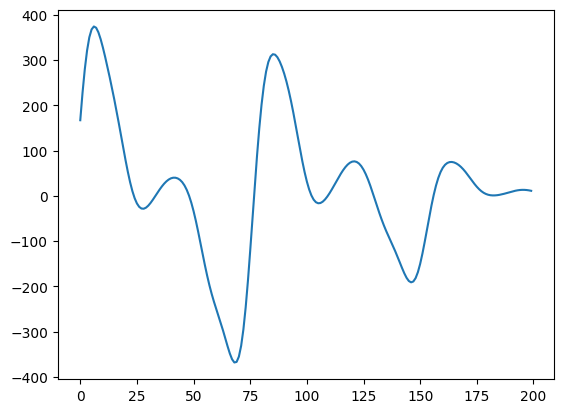

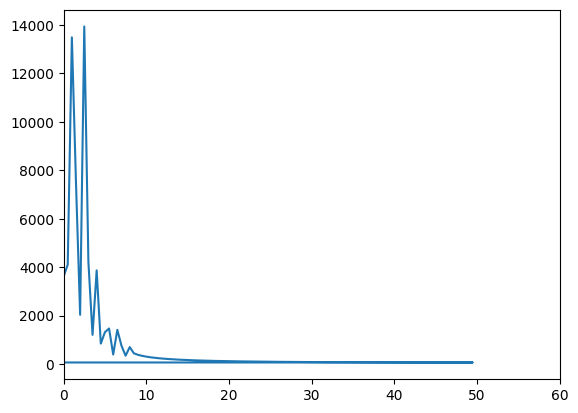

In [41]:
yFirst = (signal.sosfiltfilt(sos1, y2))
ySecond =(signal.sosfiltfilt(sos2, y2))
yThird = (signal.sosfiltfilt(sos3, y2))
yFourth = (signal.sosfiltfilt(sos4, y2))
yFifth =(signal.sosfiltfilt(sos5, y2))
ySixth = (signal.sosfiltfilt(sos6, y2))
combined_filtered_signal = np.sum([yFirst, ySecond, yThird, yFourth, yFifth, ySixth], axis=0)
plt.plot(combined_filtered_signal)
plt.show()
yf = fft(combined_filtered_signal)
xf = fftfreq(len(combined_filtered_signal), 1 / 100)

plt.xlim(0, 60)
plt.plot(xf, np.abs(yf))
plt.show()



In [42]:
yf = np.abs(yf)
yf = yf[:40]

In [44]:
import scipy

[ 2  5  8 11 13 16]
[13491.82490172 13940.59474367  3867.06313834  1466.43405005
  1411.41132737   698.28777897]


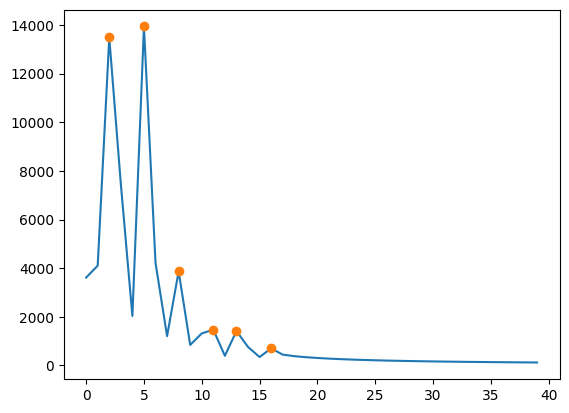

In [45]:
peaks, _ = scipy.signal.find_peaks(yf)
print(peaks)

plt.plot(yf)
print(yf[peaks])

plt.plot(peaks, yf[peaks], "o")
plt.show()


In [48]:
#Map peaks to amplitude
res = dict(map(lambda i,j : (i,j) , peaks,yf[peaks]))

res

{2: 13491.82490171824,
 5: 13940.594743672173,
 8: 3867.063138337669,
 11: 1466.4340500517108,
 13: 1411.4113273702887,
 16: 698.2877789659651}

In [49]:
#Make something like a frequency for inverse fourier transform
list = []
for i in range(40):
    if i in res:
        list.append(res[i])
    else:
        list.append(0)

print(list)

[0, 0, 13491.82490171824, 0, 0, 13940.594743672173, 0, 0, 3867.063138337669, 0, 0, 1466.4340500517108, 0, 1411.4113273702887, 0, 0, 698.2877789659651, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


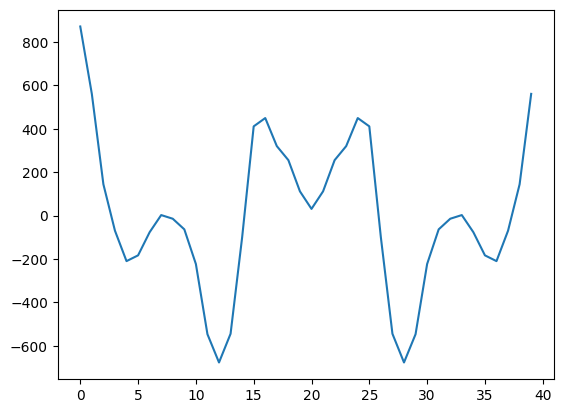

In [51]:
plt.plot(scipy.fft.ifft(list))
plt.show()

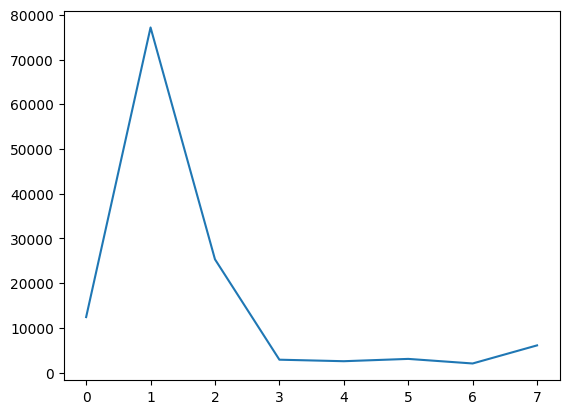

In [167]:
plt.plot(linear_interpolation(yf, 8))

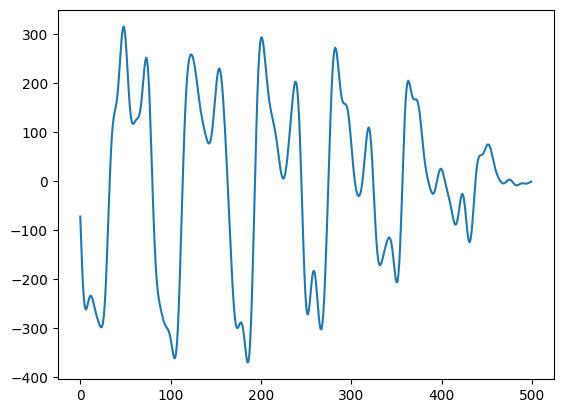

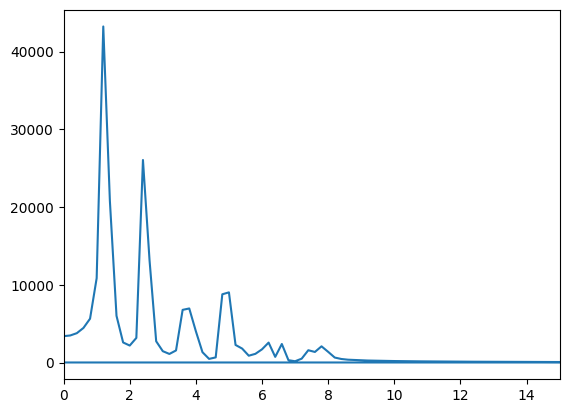

In [56]:
yFirst = (signal.sosfiltfilt(sos1, y))
ySecond =(signal.sosfiltfilt(sos2, y))
yThird = (signal.sosfiltfilt(sos3, y))
yFourth = (signal.sosfiltfilt(sos4, y))
yFifth =(signal.sosfiltfilt(sos5, y))
ySixth = (signal.sosfiltfilt(sos6, y))
combined_filtered_signal = np.sum([yFirst, ySecond, yThird, yFourth, yFifth, ySixth], axis=0)
plt.plot(combined_filtered_signal)
plt.show()
yf = fft(combined_filtered_signal)
xf = fftfreq(len(combined_filtered_signal), 1 / 100)

plt.xlim(0, 15)
plt.plot(xf, np.abs(yf))
plt.show()

Utilizing previous trained data

In [58]:
import keras

In [59]:
#Importing a previously trained model for a different project
model = keras.models.load_model("/Users/henrywang/Documents/PPGDataAnalysis3:6:24/MergedModel-MAP-6-5-24.keras")

2024-10-21 03:28:15.830161: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-21 03:28:15.830233: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-21 03:28:15.830237: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-21 03:28:15.830744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-21 03:28:15.831278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


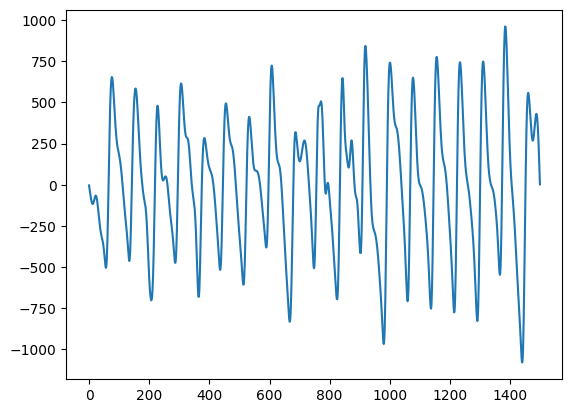

In [62]:
time, y1, y2 = np.loadtxt("/Users/henrywang/Documents/PPGBP/PPGGlucoseDetection/GlucoseReadings/2024-08-12/index-writing-13-26-55.txt", delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2
yFiltered1 = signal.sosfiltfilt(sos, y1[1500:3000])
yFiltered2 = signal.sosfiltfilt(sos, y2[1500:3000])
#Getting data
plt.plot(yFiltered2)

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 16)                   128       ['input_3[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 500)]                0         []                            
                                                                                              

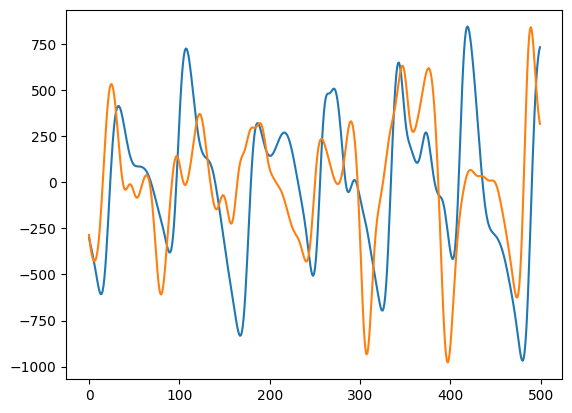

In [63]:
plt.plot(yFiltered2[500:1000])
plt.plot(yFiltered1[500:1000])

writingFinger = (yFiltered2[500:1000])
writingToe = (yFiltered1[500:1000])

In [68]:
#Making the data like original model inputs
writingFinger = np.array([yFiltered1[500:1000]])
writingToe = np.array([yFiltered2[500:1000]])
writing_features =  np.array([[17, 179, 172.2, 90,77,2,779]])

In [116]:
# #Saving the data
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingFinger", writingFinger)
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingToe", writingToe)
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingFeatures", writing_features)

In [75]:
#Testing the loaded model
mergedModel = keras.models.load_model("/Users/henrywang/Documents/PPGDataAnalysis3:6:24/MergedModelDBP-8-12-24.keras")
mergedModel.predict(x=[writingFinger, writingToe, writing_features])

1/1 [==============================] - 0s 42ms/step


array([[1430.5063]], dtype=float32)